In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
from data.data_loader import generateGauss
from utils.integral import grid
from Models.clustering import FCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF

In [3]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-5, end=15)
mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])
sig       = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
F_data    = generateGauss(mu, sig, grid_x)

Iteration 1, delta = 0.852490, objective = 1.062886
Iteration 2, delta = 0.520815, objective = 1.042054
Iteration 3, delta = 0.576296, objective = 1.012895
Iteration 4, delta = 0.336569, objective = 0.950338
Iteration 5, delta = 0.034494, objective = 0.944961
Iteration 6, delta = 0.008478, objective = 0.945564
Iteration 7, delta = 0.003875, objective = 0.945764
Iteration 8, delta = 0.001798, objective = 0.945840
Iteration 9, delta = 0.000839, objective = 0.945873
Iteration 10, delta = 0.000395, objective = 0.945887
Iteration 11, delta = 0.000187, objective = 0.945893
Iteration 12, delta = 0.000089, objective = 0.945895
Iteration 13, delta = 0.000043, objective = 0.945897
Iteration 14, delta = 0.000021, objective = 0.945897
Iteration 15, delta = 0.000010, objective = 0.945897
Iteration 16, delta = 0.000005, objective = 0.945897
Converged.


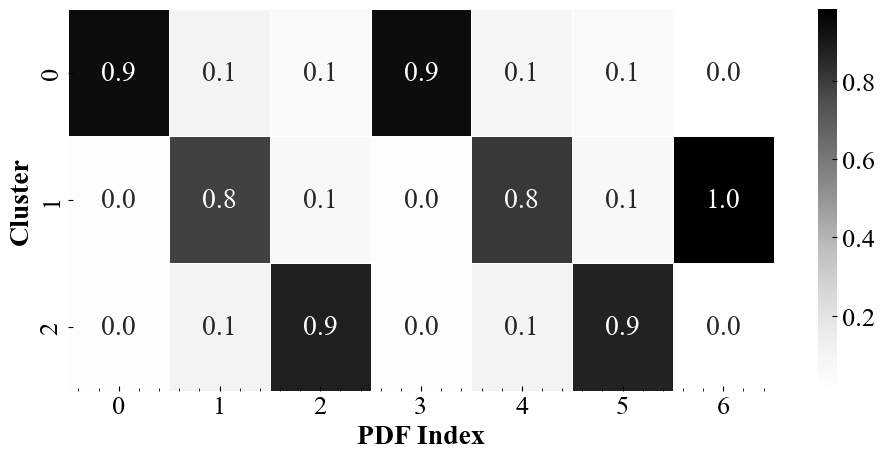

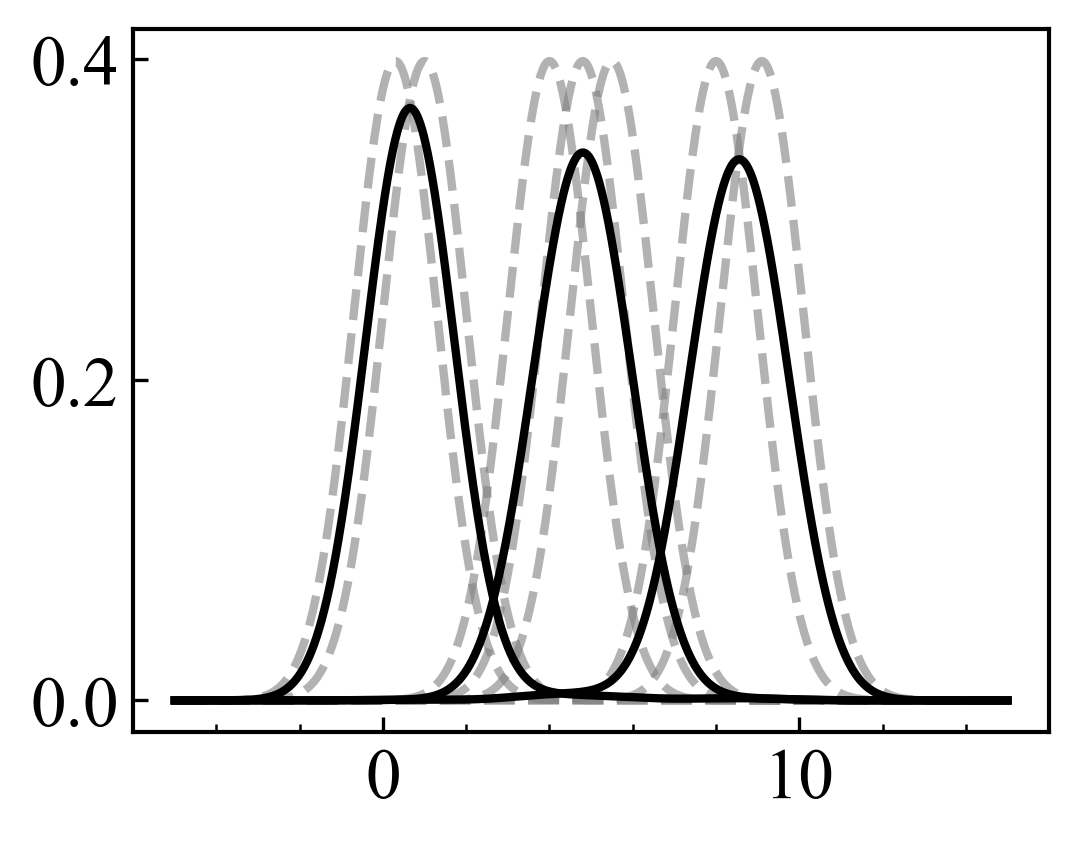

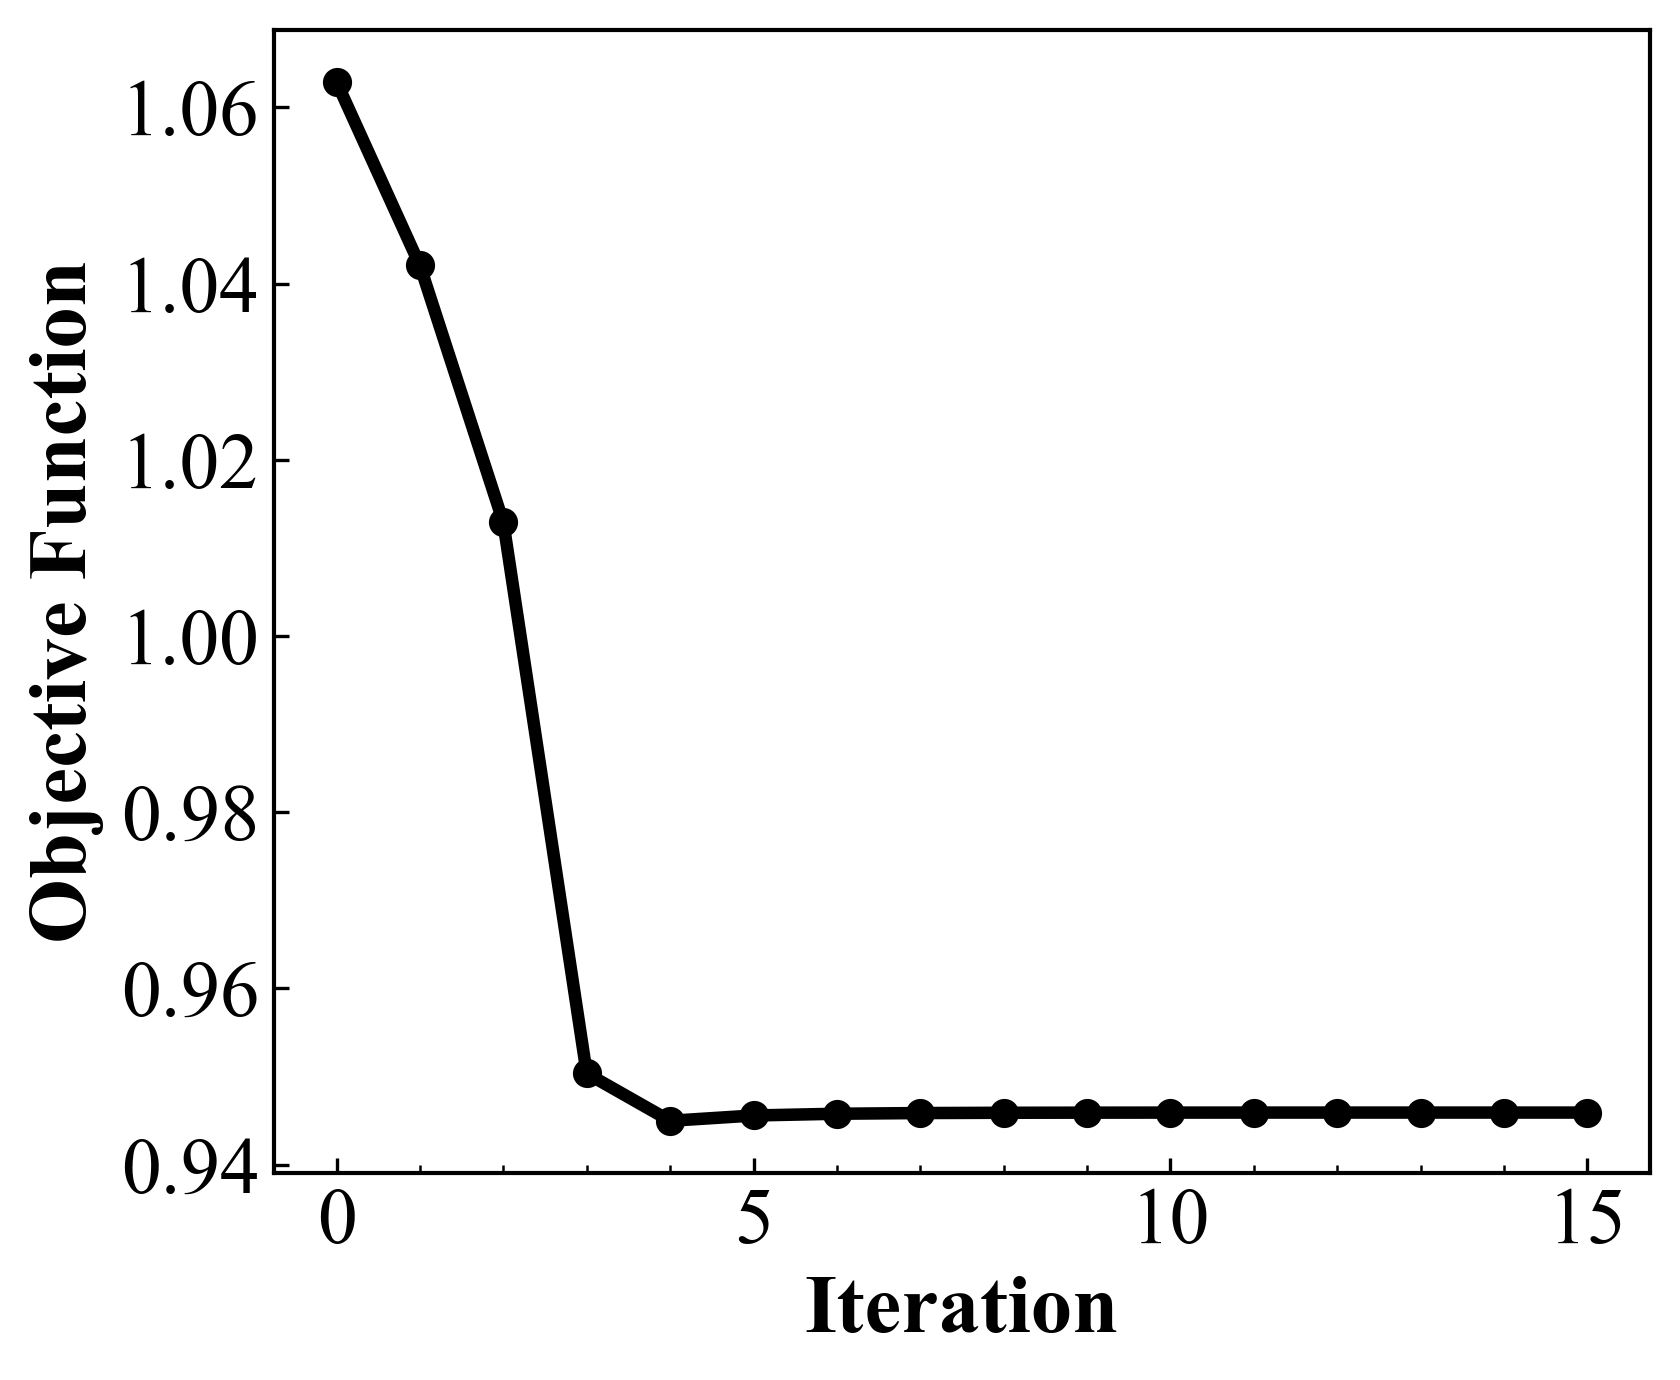

In [4]:
cluster=FCF.Model(
   grid_x=grid_x,
    num_clusters= 3,
    fuzziness= 2,
    max_iterations= 100,
    tolerance= 0.00001,
    distance_metric= 'L2',
)
cluster.fit(F_data)
U, Theta, J = cluster.get_results()

plotHeatmap_U(U)
plotPDF_Theta(grid_x, F_data, theta=Theta)
plot_OF(J)